# importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from os import path

In [2]:
data_path = '/Users/shreetamakarmakar/code/omdena_mum_aqi/omdena-mumbai-chapter-air-quality/src/data/semi_cleaned_files'

In [3]:
data_list =  [pd.read_csv(f'{data_path}/{fl}') for fl in os.listdir(data_path)]
fname_list = [fl[:-4] for fl in os.listdir(data_path)]
data_dict = dict(zip(fname_list, data_list))

In [4]:
data_dict.keys()

dict_keys(['BandraKurlaComplexMumbaiIITM', 'SiddharthNagarWorliMumbaiIITM', 'BandraMumbaiMPCB', 'BorivaliEastMumbaiIITM', 'VasaiWestMumbaiMPCB', 'KhindipadaBhandupWestMumbaiIITM', 'NavyNagarColabaMumbaiIITM', 'BorivaliEastMumbaiMPCB', 'ChhatrapatiShivajiIntlAirportT2MumbaiMPCB', 'ChakalaAndheriEastMumbaiIITM', 'WorliMumbaiMPCB', 'SionMumbaiMPCB', 'MaladWestMumbaiIITM', 'VileParleWestMumbaiMPCB', 'DeonarMumbaiIITM', 'PowaiMumbaiMPCB', 'ColabaMumbaiMPCB', 'KandivaliEastMumbaiMPCB', 'MazgaonMumbaiIITM', 'MulundWestMumbaiMPCB', 'KurlaMumbaiMPCB'])

# column field expansion

data_dictionary = {'From Date': 'Start Date', 

 'To Date': 'End Date',
 
 'PM2.5': 'Particulate Matter less than 2.5 micron size',
 
 'PM10': 'Particulate Matter less than 10 Micron size',
 
 'NO': 'Nitric Oxide',
 
 'NO2': 'Nitrogen dioxide',
 
 'NOx': 'Oxides of Nitrogen',
 
 'NH3': 'Ammonia',
 
 'SO2': 'Sulphur Dioxide',
 
 'CO': 'Carbon Monoxide',
 
 'Ozone': 'Ozone',
 
 'Benzene': 'Benzen',
 
 'Toluene': 'Toluene',
 
 'Eth-Benzene': 'Ethyl Benzene',
 
 'MP-Xylene': 'M+P Xylene',
 
 'RH': 'Relative Humidity',
 
 'WS': 'Wind Speed',
 
 'WD': 'Wind Direcction',
 
 'SR': 'Solar Radiation',
 
 'BP': 'Barometric Pressure',
 
 'Xylene': 'Xylene',
 
 'AT': 'Ambient Temperature',
 
 'RF': 'Rain Fall',
 
 'TOT-RF': 'TOT-RF',
 
 'Temp': 'Rack Temperature',
 
 'VWS': 'Vertical Wind Speed'}

# checking station-by-station for missing values in the sgnp area

In [5]:
data_dict.keys()

dict_keys(['BandraKurlaComplexMumbaiIITM', 'SiddharthNagarWorliMumbaiIITM', 'BandraMumbaiMPCB', 'BorivaliEastMumbaiIITM', 'VasaiWestMumbaiMPCB', 'KhindipadaBhandupWestMumbaiIITM', 'NavyNagarColabaMumbaiIITM', 'BorivaliEastMumbaiMPCB', 'ChhatrapatiShivajiIntlAirportT2MumbaiMPCB', 'ChakalaAndheriEastMumbaiIITM', 'WorliMumbaiMPCB', 'SionMumbaiMPCB', 'MaladWestMumbaiIITM', 'VileParleWestMumbaiMPCB', 'DeonarMumbaiIITM', 'PowaiMumbaiMPCB', 'ColabaMumbaiMPCB', 'KandivaliEastMumbaiMPCB', 'MazgaonMumbaiIITM', 'MulundWestMumbaiMPCB', 'KurlaMumbaiMPCB'])

In [12]:
borivali_iitm = data_dict[ 'BorivaliEastMumbaiIITM']
borivali_mpcb = data_dict[ 'BorivaliEastMumbaiMPCB']
kandi_east = data_dict['KandivaliEastMumbaiMPCB']
khbhandup_west = data_dict['KhindipadaBhandupWestMumbaiIITM']
powai = data_dict['PowaiMumbaiMPCB']
mulund = data_dict['MulundWestMumbaiMPCB']

In [13]:
# cleaning dataframe columns 
def clean_columns(df):
    df = df.drop('Unnamed: 0', axis = 1)
    rename_cols = [c.lower().replace('.', '_').replace(' ', '_').replace('-', '_') for c in df.columns]
    col_dict = dict(zip(df.columns.tolist(), rename_cols))
    df = df.rename(columns = col_dict)
    return df

def missing_val(df):
    return df.isnull().sum().to_frame().reset_index().rename(columns = {'index': 'col_names', 0: 'sum_missing'})

## cleaning columns

In [14]:
borivali_iitm = clean_columns(borivali_iitm)
borivali_mpcb = clean_columns(borivali_mpcb)
kandi_east = clean_columns(kandi_east)
khbhandup_west = clean_columns(khbhandup_west)
powai = clean_columns(powai)
mulund = clean_columns(mulund)

In [15]:
mulund.columns

Index(['from_date', 'to_date', 'pm2_5', 'pm10', 'no', 'no2', 'nox', 'nh3',
       'so2', 'co', 'ozone', 'benzene', 'toluene', 'eth_benzene', 'mp_xylene',
       'rh', 'ws', 'wd', 'bp', 'at', 'rf', 'tot_rf'],
      dtype='object')

## missing values

In [16]:
borivali_iitm_missing = missing_val(borivali_iitm)
borivali_mpcb_missing = missing_val(borivali_mpcb)
kandi_east_missing = missing_val(kandi_east)
khbhandup_west_missing = missing_val(khbhandup_west)
powai_missing = missing_val(powai)
mulund_missing = missing_val(mulund)

## plotting missing values for different datasets

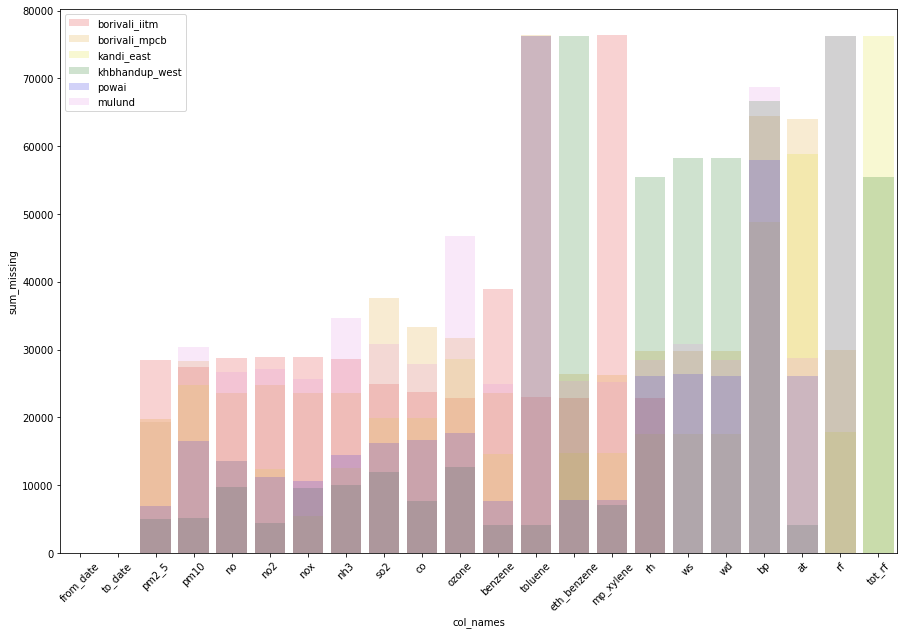

In [114]:
plt.figure(figsize = (15, 10))
sns.barplot(data = borivali_iitm_missing, x = 'col_names', y = 'sum_missing', color = 'r', alpha = 0.2, label = 'borivali_iitm')
sns.barplot(data = borivali_mpcb_missing, x = 'col_names', y = 'sum_missing', color = 'orange', alpha = 0.2, label = 'borivali_mpcb')
sns.barplot(data = kandi_east_missing, x = 'col_names', y = 'sum_missing', color = 'yellow', alpha = 0.2, label = 'kandi_east')
sns.barplot(data = khbhandup_west_missing, x = 'col_names', y = 'sum_missing', color = 'green', alpha = 0.2, label = 'khbhandup_west')
sns.barplot(data = powai_missing, x = 'col_names', y = 'sum_missing', color = 'blue', alpha = 0.2, label = 'powai')
sns.barplot(data = mulund_missing, x = 'col_names', y = 'sum_missing', color = 'violet', alpha = 0.2, label = 'mulund')
# sns.barplot(data = mulund_missing, x = 'col_names', y = 'sum_missing', color = 'cyan', alpha = 0.2, label = 'mulund_missing')

plt.xticks(rotation = 45)
plt.legend()
plt.show()

# plotting missing value row-wise distribution for 3 datasets (BorivalI MPCB, Borivali IITM, Kandi east)

<AxesSubplot:>

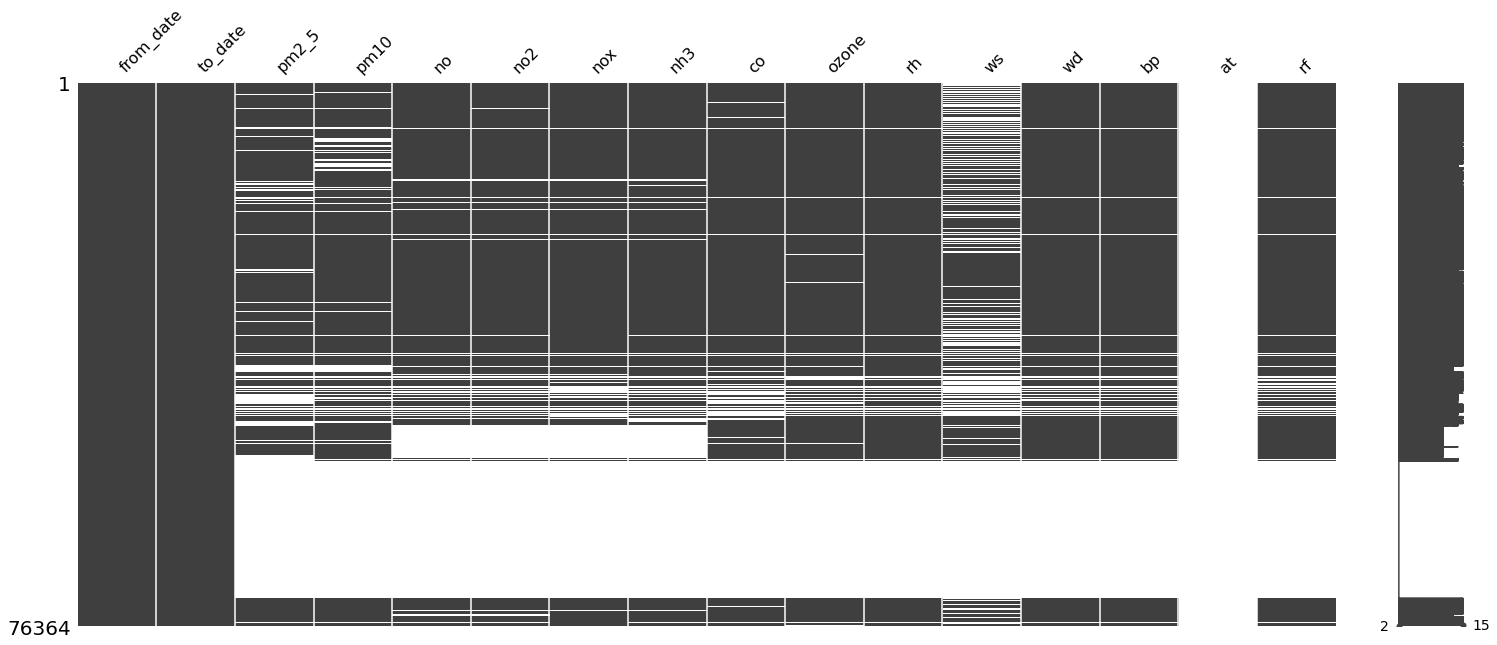

In [115]:
plt.rcParams['figure.figsize']=(16,6)
import missingno as msno
msno.matrix(borivali_iitm)

<AxesSubplot:>

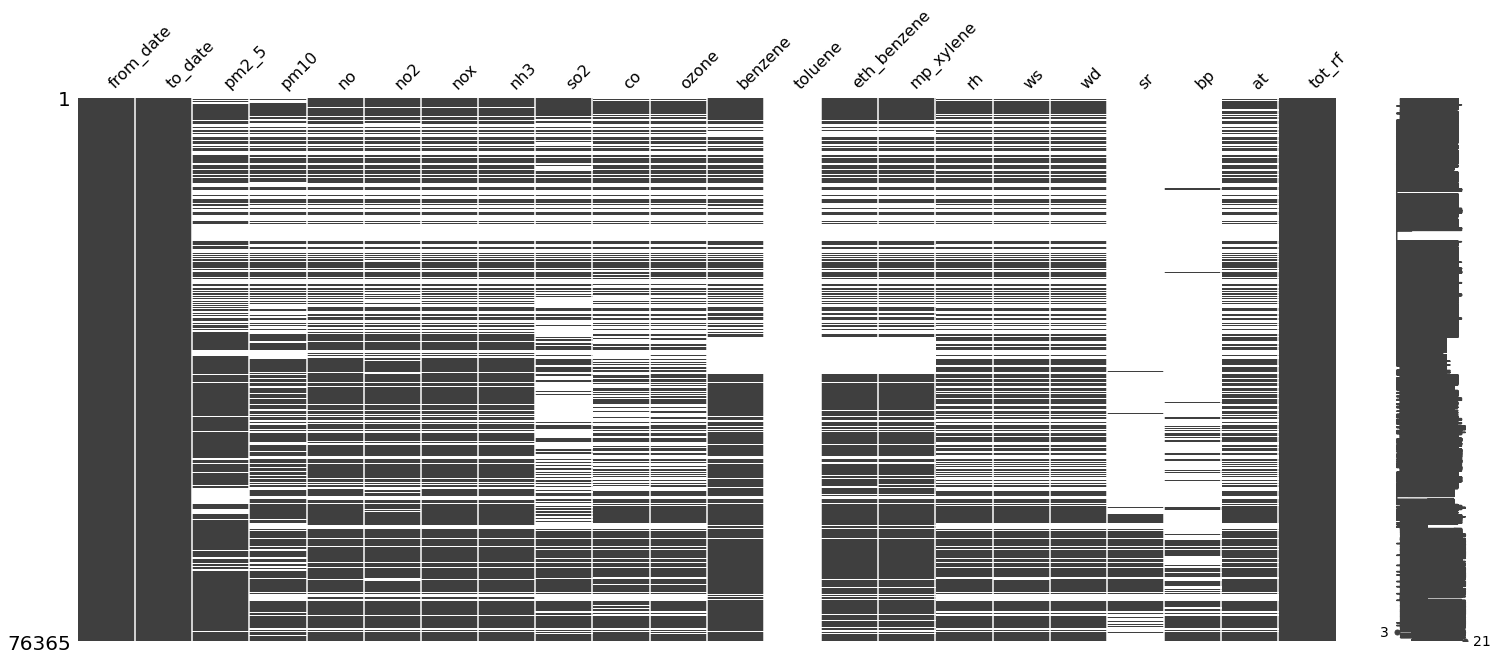

In [116]:
plt.rcParams['figure.figsize']=(16,6)
import missingno as msno
msno.matrix(borivali_mpcb)

<AxesSubplot:>

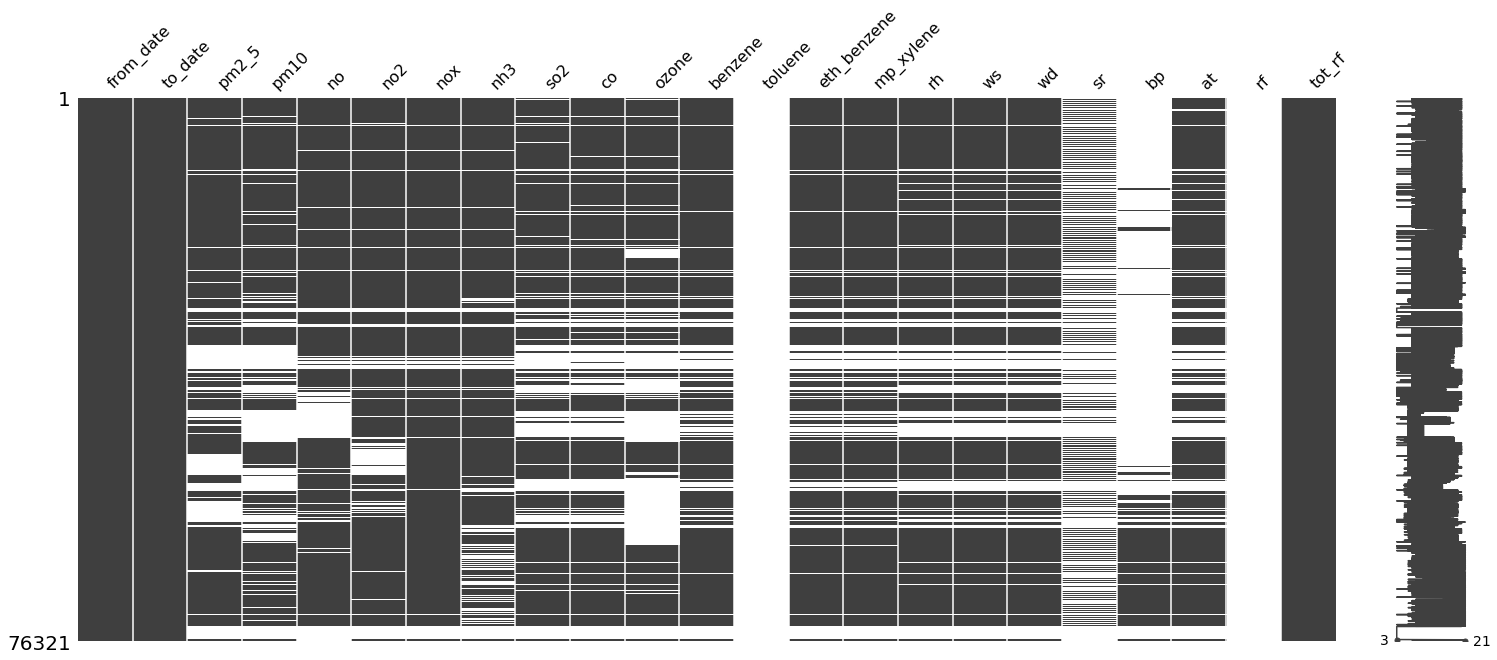

In [153]:
plt.rcParams['figure.figsize']=(16,6)
import missingno as msno
msno.matrix(kandi_east)

64458

# merging 3 stations to the west (BorivalI MPCB, Borivali IITM, Kandi east) and averaging out the column values

In [221]:
kandi_east.shape

(76321, 23)

In [222]:
borivali_mpcb.shape

(76365, 22)

In [223]:
borivali_iitm.shape

(76364, 16)

In [224]:
print(f'kandi first date{kandi_east.from_date.to_list()[0]}, borivali_mpcb first date {borivali_mpcb.from_date.to_list()[0]},borivali_iitm first date{borivali_iitm.from_date.to_list()[0]}')

kandi first date2021-01-01 00:00:00, borivali_mpcb first date 2021-01-01 00:00:00,borivali_iitm first date2021-01-01 00:00:00


In [226]:
print(f'kandi first date{kandi_east.to_date.to_list()[0]}, borivali_mpcb first date {borivali_mpcb.to_date.to_list()[0]},borivali_iitm first date {borivali_iitm.to_date.to_list()[0]}')

kandi first date2021-01-01 00:15:00, borivali_mpcb first date 2021-01-01 00:15:00,borivali_iitm first date 2021-01-01 00:15:00


In [220]:
print(f'kandi last date{kandi_east.from_date.to_list()[-1]}, borivali_mpcb last date {borivali_mpcb.from_date.to_list()[-1]},borivali_iitm last date{borivali_iitm.from_date.to_list()[-1]}')

kandi last date2023-07-03 00:00:00, borivali_mpcb last date 2023-07-03 11:00:00,borivali_iitm last date2023-07-03 10:45:00


In [228]:
print(f'kandi last date{kandi_east.to_date.to_list()[-1]}, borivali_mpcb last date {borivali_mpcb.to_date.to_list()[-1]},borivali_iitm last date{borivali_iitm.to_date.to_list()[-1]}')

kandi last date2023-07-03 00:00:00, borivali_mpcb last date 2023-07-03 11:06:00,borivali_iitm last date2023-07-03 10:56:00


In [71]:
borivali_iitm.columns

Index(['from_date', 'to_date', 'pm2_5', 'pm10', 'no', 'no2', 'nox', 'nh3',
       'co', 'ozone', 'rh', 'ws', 'wd', 'bp', 'at', 'rf'],
      dtype='object')

In [200]:
df = borivali_iitm.merge(borivali_mpcb, how = 'outer', on = 'from_date')\
.merge(kandi_east, how = 'outer',  on = 'from_date')
df = df.drop(labels = ['to_date_x', 'to_date_y'], axis = 1)
df = df.astype({"from_date": np.datetime64, "to_date": np.datetime64})

In [201]:
df.shape

(76365, 57)

In [202]:
def compute_average_3(a,b,c):
    if pd.isna(a) and pd.isna(b) and pd.isna(c):
        return np.nan
    elif pd.isna(a) and pd.isna(b):
        return c
    elif pd.isna(b) and pd.isna(c):
        return a
    elif pd.isna(c) and pd.isna(a):
        return b
    elif pd.isna(a):
        return (b+c)/2
    elif pd.isna(b):
        return (a+c)/2
    else:
        return (a + b + c) / 2

def compute_average_2(a, b):
    if pd.isna(a) and pd.isna(b):
        return np.nan
    elif pd.isna(a):
        return b
    elif pd.isna(b):
        return a
    else:
        return (a + b) / 2

In [203]:
sorted(df.columns.to_list())

['at',
 'at_x',
 'at_y',
 'benzene_x',
 'benzene_y',
 'bp',
 'bp_x',
 'bp_y',
 'co',
 'co_x',
 'co_y',
 'eth_benzene_x',
 'eth_benzene_y',
 'from_date',
 'mp_xylene_x',
 'mp_xylene_y',
 'nh3',
 'nh3_x',
 'nh3_y',
 'no',
 'no2',
 'no2_x',
 'no2_y',
 'no_x',
 'no_y',
 'nox',
 'nox_x',
 'nox_y',
 'ozone',
 'ozone_x',
 'ozone_y',
 'pm10',
 'pm10_x',
 'pm10_y',
 'pm2_5',
 'pm2_5_x',
 'pm2_5_y',
 'rf_x',
 'rf_y',
 'rh',
 'rh_x',
 'rh_y',
 'so2_x',
 'so2_y',
 'sr_x',
 'sr_y',
 'to_date',
 'toluene_x',
 'toluene_y',
 'tot_rf_x',
 'tot_rf_y',
 'wd',
 'wd_x',
 'wd_y',
 'ws',
 'ws_x',
 'ws_y']

In [204]:
df['pm2_5_mean'] = df.apply(lambda row: compute_average_3(row['pm2_5_x'], row['pm2_5_y'], row['pm2_5']), axis=1)
df['pm10_mean'] = df.apply(lambda row: compute_average_3(row['pm10_x'], row['pm10_y'], row['pm10']), axis=1)
df['no_mean'] = df.apply(lambda row: compute_average_3(row['no_x'], row['no_y'], row['no']), axis=1)
df['no2_mean'] = df.apply(lambda row: compute_average_3(row['no2_x'], row['no2_y'], row['no2']), axis=1)
df['nox_mean'] = df.apply(lambda row: compute_average_3(row['nox_x'], row['nox_y'], row['nox']), axis=1)
df['nh3_mean'] = df.apply(lambda row: compute_average_3(row['nh3_x'], row['nh3_y'], row['nh3']), axis=1)
df['so2_mean'] = df.apply(lambda row: compute_average_2(row['so2_x'], row['so2_y']), axis=1)
df['co_mean'] = df.apply(lambda row: compute_average_3(row['co_x'], row['co_y'], row['co']), axis=1)
df['ozone_mean'] = df.apply(lambda row: compute_average_3(row['ozone_x'], row['ozone_y'], row['ozone']), axis=1)
df['benzene_mean'] = df.apply(lambda row: compute_average_3(row['pm10_x'], row['pm10_y'], row['pm10']), axis=1)
df['toluene_mean'] = df.apply(lambda row: compute_average_2(row['toluene_x'], row['toluene_y']), axis=1)
df['eth_benzene_mean'] = df.apply(lambda row: compute_average_2(row['benzene_x'], row['benzene_y']), axis=1)
df['mp_xylene_mean'] = df.apply(lambda row: compute_average_2(row['mp_xylene_x'], row['mp_xylene_y']), axis=1)
df['rh_mean'] = df.apply(lambda row: compute_average_3(row['rh_x'], row['rh_y'], row['rh']), axis=1)
df['ws_mean'] = df.apply(lambda row: compute_average_3(row['ws_x'], row['ws_y'], row['ws']), axis=1)
df['wd_mean'] = df.apply(lambda row: compute_average_3(row['wd_x'], row['wd_y'], row['wd']), axis=1)
df['sr_mean'] = df.apply(lambda row: compute_average_2(row['sr_x'], row['sr_y']), axis=1)
df['bp_mean'] = df.apply(lambda row: compute_average_3(row['bp_x'], row['bp_y'], row['bp']), axis=1)
df['at_mean'] = df.apply(lambda row: compute_average_3(row['at_x'], row['at_y'], row['at']), axis=1)
df['tot_rf_mean'] = df.apply(lambda row: compute_average_2(row['tot_rf_x'], row['tot_rf_y']), axis=1)

df = df[['from_date', 'to_date', 'pm2_5_mean', 'pm10_mean', 'no_mean', 'no2_mean', 'nox_mean',\
         'nh3_mean','so2_mean','co_mean', 'ozone_mean',\
        'benzene_mean', 'toluene_mean', 'eth_benzene_mean', 'mp_xylene_mean', 'rh_mean', \
        'ws_mean', 'wd_mean', 'sr_mean', 'bp_mean', 'at_mean', 'tot_rf_mean']]

In [205]:
df['pm2_5_mean'].isna().sum()

11381

<Figure size 576x720 with 0 Axes>

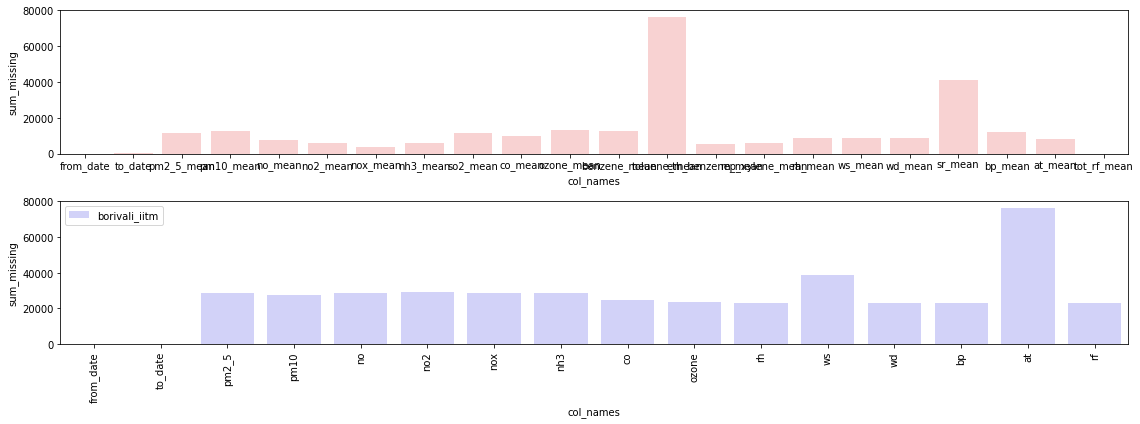

In [269]:
df_missing = missing_val(df)
plt.figure(figsize = (8, 10))
fig, ax = plt.subplots(2, 1)

sns.barplot(data = df_missing, x = 'col_names', y = 'sum_missing', color = 'r', alpha = 0.2, label = 'forest_west', ax=ax[0])
plt.xticks(rotation = 90)

sns.barplot(data = borivali_iitm_missing, x = 'col_names', y = 'sum_missing',color = 'b', alpha = 0.2, label = 'borivali_iitm', ax=ax[1])
plt.xticks(rotation = 90)
plt.legend()
# plt.ylim(0, 200)
plt.tight_layout()
plt.show()

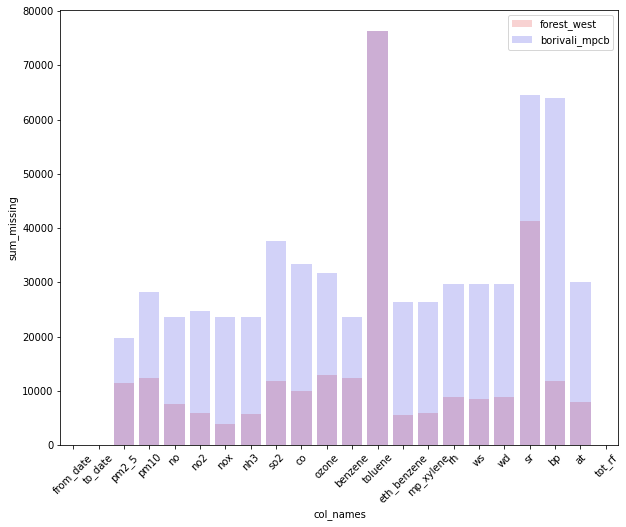

In [270]:
df_missing = missing_val(df)
plt.figure(figsize = (10, 8))
sns.barplot(data = df_missing, x = 'col_names', y = 'sum_missing', color = 'r', alpha = 0.2, label = 'forest_west')
sns.barplot(data = borivali_mpcb_missing, x = 'col_names', y = 'sum_missing', color = 'b', alpha = 0.2, label = 'borivali_mpcb')
plt.xticks(rotation = 45)
plt.legend()
# plt.ylim(0, 200)
plt.show()

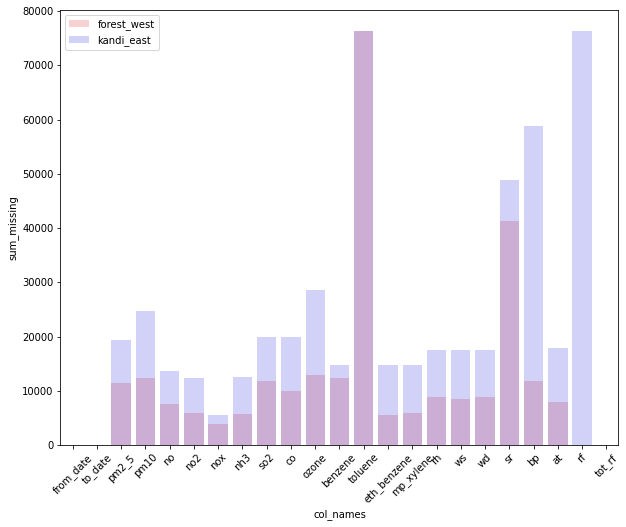

In [271]:
df_missing = missing_val(df)
plt.figure(figsize = (10, 8))
sns.barplot(data = df_missing, x = 'col_names', y = 'sum_missing', color = 'r', alpha = 0.2, label = 'forest_west')
sns.barplot(data = kandi_east_missing, x = 'col_names', y = 'sum_missing', color = 'b', alpha = 0.2, label = 'kandi_east')
plt.xticks(rotation = 45)
plt.legend()
# plt.ylim(0, 200)
plt.show()

In [229]:
df.from_date.to_list()[-1]

Timestamp('2023-07-03 11:00:00')

<AxesSubplot:>

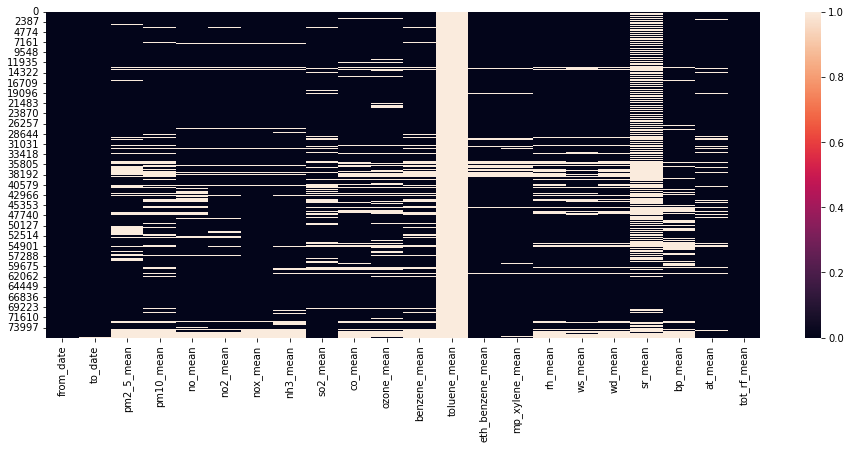

In [237]:
sns.heatmap(df.isnull())

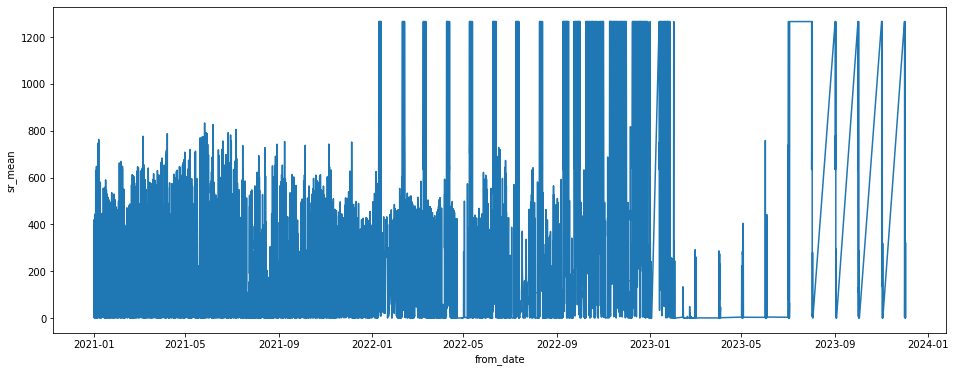

In [244]:
# plt.(df.from_date, df.sr_mean)
sns.lineplot(data = df, x = 'from_date', y = 'sr_mean')
# plt.ylim(480, 490)
plt.show()

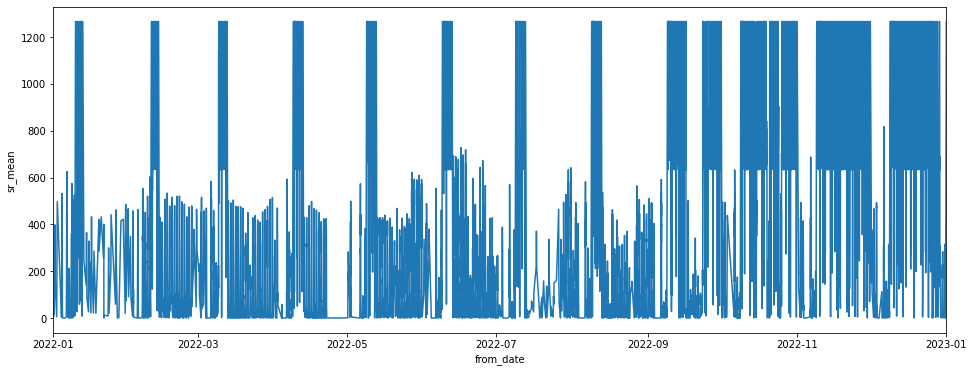

In [243]:
# plt.(df.from_date, df.sr_mean)
import datetime

sns.lineplot(data = df, x = 'from_date', y = 'sr_mean')
plt.xlim(datetime.date(2022,1,1), datetime.date(2023,1,1))
plt.show()

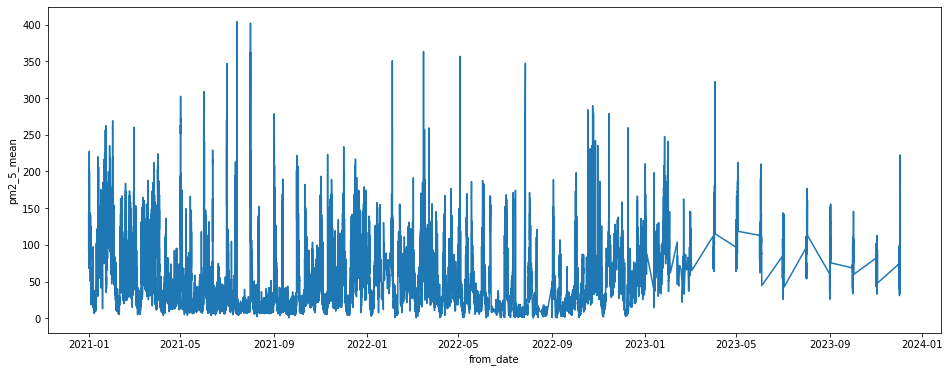

In [246]:
sns.lineplot(data = df, x = 'from_date', y = 'pm2_5_mean')
# plt.xlim(datetime.date(2022,1,1), datetime.date(2023,1,1))
plt.show()

In [156]:
ls = [1,2,3,4,5,np.nan]

In [158]:
np.nanmean([np.nan, np.nan])

/var/folders/sl/ygshjd2x6x74vgfq6g4z9mk80000gn/T/ipykernel_10393/2006840581.py:1: RuntimeWarning: Mean of empty slice
  np.nanmean([np.nan, np.nan])


nan

In [150]:
sr_data.head()

AttributeError: 'list' object has no attribute 'head'